In [253]:
#fix gryblt
# extra outlier from test

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics

sns.set()

def log_transform(df,col_name):
    df[col_name+'_Log'] = np.log(df[col_name])
    
    print("Skewness_orig: %f" % df[col_name].skew())
    print("Kurtosis_orig: %f" % df[col_name].kurt())
    print("Skewness_new: %f" % df[col_name+'_Log'].skew())
    print("Kurtosis_new: %f" % df[col_name+'_Log'].kurt())

    f, axes = plt.subplots(2, 1)
    f.tight_layout()
    sns.distplot(df[col_name], ax=axes[0])
    sns.distplot(df[col_name+'_Log'], ax=axes[1])
    
    plt.show()
    
def add_sqrt_transform(df,col_name,add):
    df[col_name+'_sqrt'] = np.sqrt(df[col_name]+add)
    
    print("Skewness_orig: %f" % df[col_name].skew())
    print("Kurtosis_orig: %f" % df[col_name].kurt())
    print("Skewness_new: %f" % df[col_name+'_sqrt'].skew())
    print("Kurtosis_new: %f" % df[col_name+'_sqrt'].kurt())

    f, axes = plt.subplots(2, 1)
    f.tight_layout()
    sns.distplot(df[col_name], ax=axes[0])
    sns.distplot(df[col_name+'_sqrt'], ax=axes[1])
    plt.show()
    
def print_missing_data(df,top=20):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(top))
    
def get_corr_pairs(df):
    corrs = df.corr() >= 0.8
    names = list(corrs.index)
    corr_pairs={}
    for item in sorted(corrs):
        relevant=[ names[ind] for ind, row in enumerate(corrs[item]) if row and names[ind] != item ]
        if len(relevant)>0:
            corr_pairs[item] = relevant
    return corr_pairs
    
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def prediction_stats(y_test,y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_pred))


In [254]:
df_train = pd.read_csv("/Users/gandharkamat/projects/8010/Final/train.csv")
df_test_data = pd.read_csv("/Users/gandharkamat/projects/8010/Final/test.csv")
sals_price=pd.read_csv("/Users/gandharkamat/projects/8010/Final/test_actual_price.csv")

df_test = pd.merge(df_test_data, sals_price,  how='inner', on='Id')

df_train['source']='train'
df_test['source']='test'
df = pd.concat([df_train,df_test], ignore_index = True, sort = False)

print(df_train.shape, df_test.shape, df.shape)


(1460, 82) (1459, 82) (2919, 82)


In [255]:
print_missing_data(df)

# cat_cols_g = ["HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond"]
# num_cols_g = ["YearBuilt","YearRemodAdd","MasVnrArea","OverallQual","OverallCond"]

# cat_cols_r = ["MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType"]
# num_cols_r = ['LotArea','LotFrontage']

# cat_cols_k = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC','CentralAir', 'Electrical']
# num_cols_k = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath']

# cat_cols_s = ["GarageFinish","GarageQual","KitchenQual","Functional","FireplaceQu","GarageType","GarageYrBlt"]
# num_cols_s = ["GarageArea","GarageCars","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces"]

# cat_cols_b = ["GarageCond","PavedDrive","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"]
# num_cols_b = ["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold"]

num_feats = ['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'OverallQual', 'OverallCond', 'LotArea', 'LotFrontage', 'GarageArea', 'GarageCars', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
cat_feats = ['HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'GarageFinish', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition','GarageCond','GarageQual']

fillna_cat_cols = [
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "BsmtCond",
    "BsmtQual",
    "Fence",
    "FireplaceQu",
    'GarageQual', 
    'GarageCond',
    "GarageFinish",
    "GarageType",
    "MiscFeature",
    "PoolQC",
    'Alley'
]

for item in fillna_cat_cols:
    df[item].fillna('None',inplace=True)
    
fill0_num_columns=['GarageArea','GarageCars']

for item in fill0_num_columns:
    df[df['GarageType']=='None'][item].fillna(0,inplace=True)

fillNone_cat_columns=['GarageYrBlt']

for item in fillNone_cat_columns:
    df[df['GarageType']=='None'][item].fillna('None',inplace=True)
    df[df[item]>2010][item].fillna(df[item].mean(),inplace=True)

#fill lotfrontage by mean of neighbothood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

fillmean_num_cols = ["MasVnrArea",'GarageArea','GarageCars','BsmtFinSF1','TotalBsmtSF','BsmtFinSF2','BsmtUnfSF']

for item in fillmean_num_cols:
    df[item].fillna(df[item].mean(),inplace=True)

fill0_num_cols=['BsmtHalfBath','BsmtFullBath']

for item in fill0_num_cols:
    df[df['BsmtCond']=='None'][item].fillna(0,inplace=True)

fillmode_cat_cols = ['Electrical','MasVnrType','Exterior1st','Exterior2nd','KitchenQual','GarageYrBlt','Utilities','SaleType','BsmtHalfBath','BsmtFullBath']

for item in fillmode_cat_cols:
    df[item].fillna(df[item].mode().iloc[0],inplace=True)

#from data dict
df["Functional"] = df["Functional"].fillna("Typ")

print_missing_data(df)


              Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageFinish    159  0.054471
GarageYrBlt     159  0.054471
GarageQual      159  0.054471
GarageCond      159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370
BsmtFullBath      2  0.000685
              Total  Percent
source            0      0.0
YearRemodAdd      0      0.0
RoofMatl          0      0.0
Exterior1st       0      0.0
Exterior2nd       0      0.0
MasVnrType        0      0.0
MasVnrArea        0      0.0
ExterQual         0      0.0
ExterCond         0      0.0
Foundation        0      0.0
BsmtQual          0      0.0
BsmtCond          0   

/Users/gandharkamat/projects/venv/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


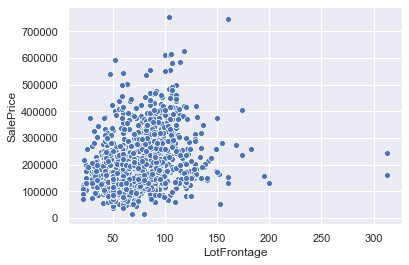

In [256]:
sns.scatterplot(df['LotFrontage'],df['SalePrice'])

Skewness_orig: 1.750102
Kurtosis_orig: 5.180770
Skewness_new: -0.014710
Kurtosis_new: 1.530083


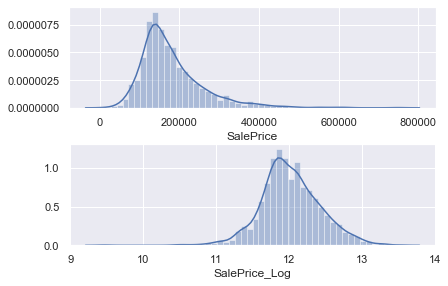

In [257]:
# new feats
# df['Remodel'] = df['YearRemodAdd'] - df['YearBuilt']
# df['Remodel'] = df['Remodel'].apply(lambda x: 1 if x > 0 else 0 )
# cat_feats.append('Remodel')

# df['NewH'] = df['YrSold'] - df['YearBuilt']
# df['NewH'] = df['NewH'].apply(lambda x: 1 if x == 0 else 0)
# cat_feats.append('NewH')

# df = df.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
# cat_feats = list(set(cat_feats) - set(['Utilities', 'Street', 'PoolQC']))

# df['YrBltAndRemod']=df['YearBuilt']+df['YearRemodAdd']
# df['TotalSF']=df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] +
#                                  df['1stFlrSF'] + df['2ndFlrSF'])

# df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
#                                df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

# df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
#                               df['EnclosedPorch'] + df['ScreenPorch'] +
#                               df['WoodDeckSF'])

# df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
# df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# num_feats.append('YrBltAndRemod')
# num_feats.append('TotalSF')
# num_feats.append('Total_sqr_footage')
# num_feats.append('Total_Bathrooms')
# num_feats.append('Total_porch_sf')


# cat_feats.append('haspool')
# cat_feats.append('has2ndfloor')
# cat_feats.append('hasgarage')
# cat_feats.append('hasbsmt')
# cat_feats.append('hasfireplace')

# df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
# num_feats.append('TotalSF')

# df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0 )
# df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])
# cat_feats.append('HasBsmt')

#outliers

df.drop(df[(df['source'] == 'train') & (df['GrLivArea']>5000)].index,inplace=True)
df.drop(df[(df['source'] == 'train') & (df['LotArea']>50000)].index,inplace=True)
df.drop(df[(df['source'] == 'train') & (df['LotFrontage']>250)].index,inplace=True)


col='SalePrice'
log_transform(df,col)
num_feats.remove(col)
num_feats.append(col+'_Log')


In [258]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c, nr_c))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 12}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

# plot_corr_matrix(df, len(num_feats), 'SalePrice_Log')


In [259]:
print(get_corr_pairs(df_train))

drops = ['TotRmsAbvGrd','GarageArea','1stFlrSF']

drops = ['TotRmsAbvGrd','GarageArea','1stFlrSF','2ndFlrSF','HalfBath','BedroomAbvGr','BsmtFullBath','FullBath','YearRemodAdd','3SsnPorch',"PoolArea","MoSold","KitchenAbvGr","YrSold","MiscVal",'LowQualFinSF']
drop_cat=['GarageYrBlt','MSSubClass']

num_feats = list(set(num_feats) - set(drops))
cat_feats = list(set(cat_feats) - set(drop_cat))

# sns.scatterplot(df['TotalSF'],df['SalePrice_Log'])

{'1stFlrSF': ['TotalBsmtSF'], 'GarageArea': ['GarageCars'], 'GarageCars': ['GarageArea'], 'GarageYrBlt': ['YearBuilt'], 'GrLivArea': ['TotRmsAbvGrd'], 'TotRmsAbvGrd': ['GrLivArea'], 'TotalBsmtSF': ['1stFlrSF'], 'YearBuilt': ['GarageYrBlt']}


19


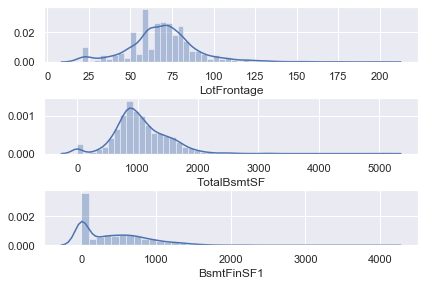

In [260]:
# a4_dims = (11.7, 8.27)
f, axes = plt.subplots(3, 1)
f.tight_layout()
print(len(num_feats))

# for i in range(3):
#     add = 6
#     sns.scatterplot(df[num_feats[i+add]],df['SalePrice_Log'],ax=axes[i])

for i in range(3):
    add = 6
    sns.distplot(df[num_feats[i+add]],ax=axes[i])
 
plt.show()


# numeric_feats = df.dtypes[df.dtypes != "object"].index
# skewed_feats = df[numeric_feats].apply(lambda x: pd.DataFrame.skew(x)) #compute skewness
# skewed_feats = skewed_feats[skewed_feats > 0.75]
# skewed_feats = skewed_feats.index
# df[skewed_feats] = np.log1p(df[skewed_feats])

# skewed_feats


Skewness_orig: 2.749677
Kurtosis_orig: 17.197592
Skewness_new: -0.937353
Kurtosis_new: 2.620334


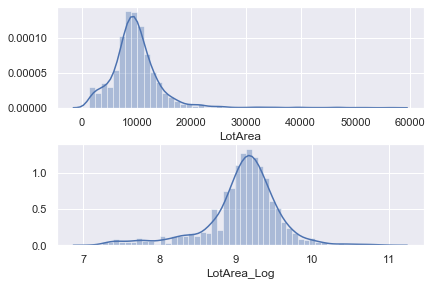

In [261]:
col='LotArea'
log_transform(df,col)
num_feats.remove(col)
num_feats.append(col+'_Log')

# dropped col
# col='1stFlrSF'
# log_transform(df,col)
# num_feats.remove(col)
# num_feats.append(col+'_Log')

Skewness_orig: 1.130984
Kurtosis_orig: 2.871508
Skewness_new: -0.007043
Kurtosis_new: 0.139537


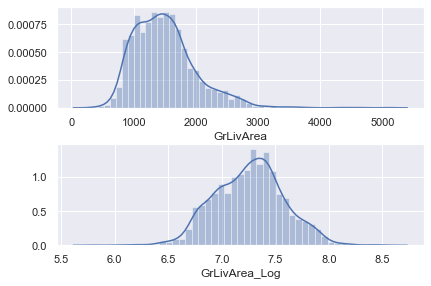

In [262]:
col='GrLivArea'
log_transform(df,col)
num_feats.remove(col)
num_feats.append(col+'_Log')


In [263]:
# scale_variables = ['LotFrontage', 'LotArea_Log', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea_Log', 'GarageYrBlt', 'GarageArea', 'PoolArea']
from sklearn.preprocessing import StandardScaler 
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[list(set(num_feats) - set(['SalePrice_Log']))]), index=df[list(set(num_feats) - set(['SalePrice_Log']))].index, columns=df[list(set(num_feats) - set(['SalePrice_Log']))].columns)
df_scaled

,WoodDeckSF,Fireplaces,EnclosedPorch,GarageCars,LotArea_Log,YearBuilt,MasVnrArea,BsmtFinSF1,ScreenPorch,OverallCond,BsmtUnfSF,BsmtFinSF2,OpenPorchSF,OverallQual,BsmtHalfBath,LotFrontage,TotalBsmtSF,GrLivArea_Log
0,0.000000,-1.0,0.0,0.0,-0.252717,0.625000,1.202454,0.461749,0.0,0.0,-0.544369,0.0,0.500000,0.5,0.0,-0.25,-0.261386,0.390479
1,1.773810,0.0,0.0,0.0,0.041149,0.062500,0.000000,0.833333,0.0,3.0,-0.315700,0.0,-0.371429,0.0,1.0,0.50,0.542574,-0.305427
2,0.000000,0.0,0.0,0.0,0.406430,0.583333,0.993865,0.161202,0.0,0.0,-0.059727,0.0,0.228571,0.5,0.0,-0.10,-0.134653,0.490091
3,0.000000,0.0,272.0,1.0,0.029123,-1.208333,0.000000,-0.207650,0.0,0.0,0.121160,0.0,0.128571,0.5,0.0,-0.50,-0.459406,0.399837
4,1.142857,0.0,0.0,1.0,0.952469,0.562500,2.147239,0.392077,0.0,0.0,0.035836,0.0,0.828571,1.0,0.0,0.70,0.310891,0.965571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.000000,-1.0,0.0,-2.0,-3.646411,-0.062500,0.000000,-0.502732,0.0,2.0,0.131399,0.0,-0.371429,-1.0,0.0,-2.45,-0.875248,-0.636862
2915,0.000000,-1.0,0.0,-1.0,-3.696925,-0.062500,0.000000,-0.158470,0.0,0.0,-0.298635,0.0,-0.028571,-1.0,0.0,-2.45,-0.875248,-0.636862
2916,2.821429,0.0,0.0,0.0,1.731543,-0.270833,0.000000,1.169399,0.0,2.0,-0.800341,0.0,-0.371429,-0.5,0.0,4.50,0.467327,-0.375462
2917,0.476190,-1.0,0.0,-2.0,0.234556,0.395833,0.000000,-0.042350,0.0,0.0,0.180887,0.0,0.085714,-0.5,1.0,-0.40,-0.150495,-0.908242


In [264]:
#dummies 
df_dummies = pd.concat([df.loc[:,'source'],df_scaled,pd.get_dummies(df.loc[:,cat_feats]),df.loc[:,'SalePrice_Log']],axis=1)

#prep for models 
train = df_dummies.loc[df_dummies['source']=="train"]
test = df_dummies.loc[df_dummies['source']=="test"]

train.drop(['source'],axis=1,inplace=True)
test.drop(['source'],axis=1,inplace=True)

target = 'SalePrice_Log'
X = train.drop(target,axis=1)
y = train[target]

X_test = test.drop(target,axis=1)
y_test = test[target]
print(X.shape,y.shape,X_test.shape,y_test.shape)
output_all = pd.DataFrame()
output_all['actual'] = np.exp(y_test)
print_missing_data(X)

(1448, 283) (1448,) (1459, 283) (1459,)
                     Total  Percent
GarageCond_TA            0      0.0
Exterior1st_Stone        0      0.0
Exterior1st_CBlock       0      0.0
Exterior1st_CemntBd      0      0.0
Exterior1st_HdBoard      0      0.0
Exterior1st_ImStucc      0      0.0
Exterior1st_MetalSd      0      0.0
Exterior1st_Plywood      0      0.0
Exterior1st_Stucco       0      0.0
Exterior1st_BrkComm      0      0.0
Exterior1st_VinylSd      0      0.0
Exterior1st_Wd Sdng      0      0.0
Exterior1st_WdShing      0      0.0
BsmtQual_Ex              0      0.0
BsmtQual_Fa              0      0.0
BsmtQual_Gd              0      0.0
Exterior1st_BrkFace      0      0.0
Exterior1st_AsphShn      0      0.0
SaleType_ConLD           0      0.0
Alley_Pave               0      0.0


/Users/gandharkamat/projects/venv/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [265]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# @ignore_warnings(category=ConvergenceWarning)


lasso = Lasso() # 1
parameters = {'alpha': [1e-4,2e-4,4e-4,8e-4,1e-3,1e-2,1],
             'fit_intercept':[True,False],
             'normalize': [True,False]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=5,n_jobs=-1,verbose=2)
lasso_regressor.fit(X,y) # 2

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

y_pred = lasso_regressor.predict(X_test) # 3

prediction_stats(np.exp(y_test),np.exp(y_pred)) # 4 
output_all['lasso'] = np.exp(y_pred)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s


{'alpha': 0.0008, 'fit_intercept': True, 'normalize': False}
-0.013786968804661045
Mean Absolute Error: 13864.21596019736
Mean Squared Error: 884521538.0642194
Root Mean Squared Error: 29740.906813078505
Mean Absolute Percentage Error: 8.445370512694739


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.5s finished


In [221]:
from sklearn.linear_model import Ridge
# def ridge_thing():
ridge = Ridge()
parameters = {'alpha': [ 11 + 0.01*i for i in range(500)],
             'fit_intercept':[True,False],
             'normalize': [True,False]
             }

ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=5,n_jobs=-1,verbose=2)
ridge_regressor.fit(X,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

y_pred = ridge_regressor.predict(X_test)

prediction_stats(np.exp(y_test),np.exp(y_pred))
output_all['ridge'] = np.exp(y_pred)

# ridge_thing()


Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 2296 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 4560 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 7480 tasks      | elapsed:   37.6s


{'alpha': 13.33, 'fit_intercept': True, 'normalize': False}
-0.014192599359216778
Mean Absolute Error: 13578.271764857009
Mean Squared Error: 837320725.0372308
Root Mean Squared Error: 28936.494691604075
Mean Absolute Percentage Error: 8.273411641259596


[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:   50.4s finished


In [214]:
np.sqrt(metrics.mean_squared_log_error( output_all['actual'],output_all['ridge']))

0.12615739434740636

In [215]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {"max_depth": range(2,10,2),
              'min_samples_split': [2,5,8,10],
            "max_features": [1, 3, 10, 50, 100, 'sqrt', 'auto','log2']}

regressor_dtree = DecisionTreeRegressor()
dtree=GridSearchCV(regressor_dtree,param_grid,cv=5,n_jobs=-1,verbose=2)
dtree.fit(X,y)
print(dtree.best_estimator_)

y_pred = dtree.predict(X_test)

prediction_stats(np.exp(y_test),np.exp(y_pred))
output_all['dtree'] = np.exp(y_pred)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 602 tasks      | elapsed:    4.1s


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=100,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
Mean Absolute Error: 23478.50812484827
Mean Squared Error: 1475691270.5603936
Root Mean Squared Error: 38414.72726130427
Mean Absolute Percentage Error: 13.996641101409232


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    4.4s finished
/Users/gandharkamat/projects/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [216]:
from sklearn.ensemble import RandomForestRegressor

rfp = RandomForestRegressor()

param_grid = {"max_depth": [17,19,21],
              "n_estimators": [1500],
            "max_features": ['auto'],
             "bootstrap": [True]}

rf = GridSearchCV(rfp, param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
rf.fit(X, y)
print(rf.best_estimator_)

y_pred = rf.predict(X_test)
output_all['rf'] = np.exp(y_pred)

prediction_stats(np.exp(y_test),np.exp(y_pred))


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   51.2s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.3min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Mean Absolute Error: 15888.328611771527
Mean Squared Error: 599710638.0102543
Root Mean Squared Error: 24488.990138636877
Mean Absolute Percentage Error: 9.670682344626428


In [217]:
import xgboost as xgb

param_grid = {
    "max_depth": range(3,5,1),
    "n_estimators": range(400,420,5),
    'objective':['reg:squarederror']
    }

model_xgb = xgb.XGBRegressor()

xgbr=GridSearchCV(model_xgb,param_grid,cv=5,n_jobs=-1,verbose=2)
xgbr.fit(X,y)
print(xgbr.best_estimator_)

y_pred = xgbr.predict(X_test)

# model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)
# model_xgb.fit(X, y)

# y_pred = model_xgb.predict(X_test)

prediction_stats(np.exp(y_test),np.exp(y_pred))
output_all['xgb'] = np.exp(y_pred)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.1min finished
/Users/gandharkamat/projects/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/gandharkamat/projects/venv/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=410,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)
Mean Absolute Error: 13767.975197052776
Mean Squared Error: 426232644.59327376
Root Mean Squared Error: 20645.402504995483
Mean Absolute Percentage Error: 8.491514315029345


In [218]:
# graph multiple models 
output_all
# [ 10 + 0.01*i for i in range(500)]
# sns.scatterplot(output_all['actual'],output_all['ridge'])

,actual,lasso,ridge,dtree,rf,xgb
1460,105000.0,115820.439639,116926.622730,142031.648162,127642.733843,133692.421875
1461,172000.0,159491.783256,159605.416254,144892.054284,163963.382725,164849.437500
1462,189900.0,182220.505248,182784.810365,173535.649223,175575.299014,189835.921875
1463,195500.0,205470.202404,202815.689463,183703.942573,186617.258305,195052.593750
1464,191500.0,193467.335569,194673.847879,193766.775108,192296.855450,183791.843750
...,...,...,...,...,...,...
2914,90500.0,91915.292767,88489.045819,94870.685183,86581.668572,81609.343750
2915,71000.0,85503.436753,81150.699766,119907.554279,91156.309484,80434.500000
2916,131000.0,171196.661868,171838.960731,142031.648162,164449.366004,175646.734375
2917,132000.0,120370.725901,117323.174470,94870.685183,111187.968055,115740.320312


In [223]:
from sklearn.ensemble import VotingRegressor

ereg = VotingRegressor([('lasso', lasso_regressor), ('ridge', ridge_regressor), ('dtree',dtree)('rf', rf),('xgb',xgbr)])
ereg.fit(X, y)

y_pred = ereg.predict(X_test)

output_all['voting'] = np.exp(y_pred)
prediction_stats(np.exp(y_test),np.exp(y_pred))


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    6.6s finished


Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 2296 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 4560 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 7480 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:   52.2s finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   50.8s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.3min finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.1min finished
/Users/gandharkamat/projects/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/gandharkamat/projects/venv/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Mean Absolute Error: 12789.693297395317
Mean Squared Error: 452270414.0244207
Root Mean Squared Error: 21266.65027747484
Mean Absolute Percentage Error: 7.8655595322575405


In [25]:
#linear reg to find linear combination of individual

from sklearn import linear_model

X_final = output_all.drop(['actual','lr','guess'],axis=1) # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y_final = output_all['actual']

regr = linear_model.LinearRegression()
regr.fit(X_final, Y_final)

print(regr.coef_,regr.intercept_)

# lasso 	ridge 	xgb 	dtree 	rf

output_all['lr'] = regr.intercept_ +  \
    regr.coef_[0]*output_all['lasso']+ \
    regr.coef_[1]*output_all['ridge']+ \
    regr.coef_[2]*output_all['dtree']+ \
    regr.coef_[3]*output_all['rf'] +\
    regr.coef_[4]*output_all['xgb']

output_all['lr']

print(output_all['actual'],output_all['lr'])
prediction_stats(output_all['actual'],output_all['lr'])

output_all['guess'] = 0.45*output_all['lasso']+ 0.45*output_all['ridge'] +.1*output_all['xgb']
prediction_stats(output_all['actual'],output_all['guess'])


[ 0.42120571  0.47927629 -0.06313803  0.1994802   0.00827332] -5179.50594529853
1460    105000.0
1461    172000.0
1462    189900.0
1463    195500.0
1464    191500.0
          ...   
2914     90500.0
2915     71000.0
2916    131000.0
2917    132000.0
2918    188000.0
Name: actual, Length: 1458, dtype: float64 1460    116926.626113
1461    157683.023582
1462    183623.824389
1463    203561.769289
1464    196559.981048
            ...      
2914     88962.524059
2915     83224.043960
2916    173123.814329
2917    117443.506358
2918    229729.576662
Name: lr, Length: 1458, dtype: float64
Mean Absolute Error: 12827.879518035787
Mean Squared Error: 334062860.6085543
Root Mean Squared Error: 18277.38659131973
Mean Absolute Percentage Error: 7.897707931016916
Mean Absolute Error: 12836.516216122656
Mean Squared Error: 354403110.60014814
Root Mean Squared Error: 18825.59721762229
Mean Absolute Percentage Error: 7.851828251942868


In [26]:
np.sqrt(metrics.mean_squared_log_error( output_all['actual'],output_all['guess']))

0.11736757227293014

In [ ]:
np.log(18381.063738313493)